# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [194]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [195]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [196]:
spaceship.shape

(8693, 14)

**Check for data types**

In [197]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [198]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [199]:
# Drop rows with missing values across the specified columns
spaceship_cleaned = spaceship.dropna(subset=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 
                                'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'])

# Checking again for missing values = no more missing values
spaceship_cleaned.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [200]:
# Extract the first letter from each cabin value and replace the original column
spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].str.extract(r'([A-Za-z])')

spaceship_cleaned2 = spaceship_cleaned.copy()
spaceship_cleaned2

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_41268/3893915881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].str.extract(r'([A-Za-z])')


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- Drop PassengerId and Name

In [201]:
# Dropping multiple columns
columns_to_drop = ['PassengerId', 'Name']
spaceship_cleaned2.drop(columns=columns_to_drop, inplace=True)
spaceship_cleaned2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


- For non-numerical columns, do dummies.

In [202]:
# Convert non-numerical columns to dummy variables
spaceship_cleaned = pd.get_dummies(spaceship_cleaned, columns=['HomePlanet', 'Cabin', 'Destination'], drop_first=True)

spaceship_cleaned

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,False,True,False,False,False,False,False,False,False,True
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,False,False,False,False,False,True,False,False,False,True
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,False,False,False,False,False,False,False,False,False,True
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,False,False,False,False,False,False,False,False,False,True
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,False,False,False,False,False,False,False,False,False,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,False,False,False,False,False,False,True,False,True,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,False,False,False,False,False,False,True,False,False,True
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,False,False,False,False,True,False,False,False,False,False


In [233]:
spaceship_cleaned.dtypes

PassengerId                   object
CryoSleep                     object
Age                          float64
VIP                           object
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                     bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Cabin_B                         bool
Cabin_C                         bool
Cabin_D                         bool
Cabin_E                         bool
Cabin_F                         bool
Cabin_G                         bool
Cabin_T                         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
dtype: object

**Perform Train Test Split**

In [235]:
features = spaceship_cleaned2.drop(columns=["Transported", "HomePlanet", "Cabin", "Destination"])
target = spaceship_cleaned2["Transported"].astype(int)

In [236]:
features

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [237]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [219]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [239]:
normalizer = MinMaxScaler()

In [240]:
normalizer.fit(X_train)

MinMaxScaler()

In [241]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [242]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000
3,0.0,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049
4,1.0,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


In [243]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.632911,0.0,0.0,0.000000,0.0,0.00000,0.0
1,1.0,0.227848,0.0,0.0,0.000000,0.0,0.00000,0.0
2,1.0,0.189873,0.0,0.0,0.000000,0.0,0.00000,0.0
3,1.0,0.658228,0.0,0.0,0.000000,0.0,0.00000,0.0
4,0.0,0.784810,1.0,0.0,0.054775,0.0,0.07774,0.0


In [244]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [245]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [246]:
knn.score(X_test_norm, y_test)

0.7594553706505295

In [247]:
pred = knn.predict(X_test_norm)

In [248]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

0.2405446293494705
0.4904534935643445


Ask tomorrow why the values are low?

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [249]:
features

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [250]:
df=features.copy()
df['target'] = target
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,target
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


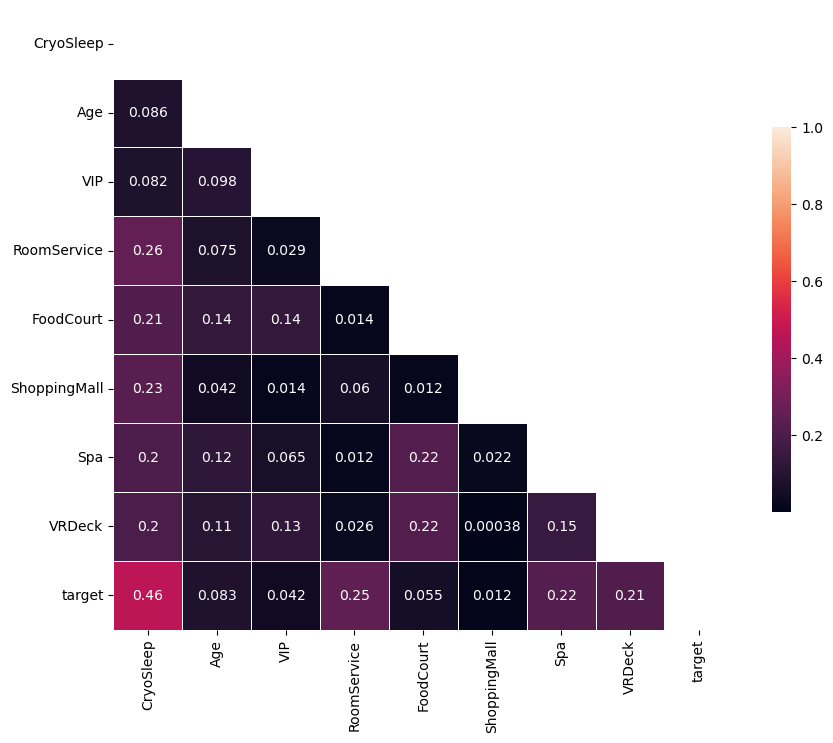

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

- Evaluate your model's performance. Comment it

In [252]:
#precision score, #F1 score

from sklearn.metrics import precision_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Precision:", precision)
print("F1-score:", f1)


Precision: 0.7540740740740741
F1-score: 0.7619760479041916
